In [22]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [23]:
# 清理文本的函數
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # 移除 URL
    text = re.sub(r"@\w+", "", text)    # 移除提及
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # 移除非字母字符
    text = text.lower().strip()  # 小寫化並去除多餘空格
    return text


In [24]:
# 使用 VADER 進行情感分析
def analyze_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "POSITIVE"
    elif score['compound'] <= -0.05:
        return "NEGATIVE"
    else:
        return "NEUTRAL"


In [25]:
# 讀取 CSV 文件
file_path = './src/top_election_posts_2024.csv'
data = pd.read_csv(file_path, encoding='latin1')


# 清理文本
data = data.dropna(subset=['text'])
data['cleaned_text'] = data['text'].apply(clean_text)
data = data[data['cleaned_text'].str.strip().str.len() > 5]


In [26]:
# 初始化 VADER 分析器
analyzer = SentimentIntensityAnalyzer()

# 添加情感分析列
data['sentiment'] = data['cleaned_text'].apply(analyze_sentiment_vader)


In [27]:
# 計算情感分佈
sentiment_counts = data['sentiment'].value_counts(normalize=True)
print("Sentiment Distribution:")
print(sentiment_counts)

# 如果想要在 Jupyter 中展示數據框
data.head()


Sentiment Distribution:
sentiment
POSITIVE    0.589663
NEGATIVE    0.349256
NEUTRAL     0.061081
Name: proportion, dtype: float64


,subreddit,id,title,text,author,created_at,upvotes,num_comments,url,permalink,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,cleaned_text,sentiment
0,PoliticalDiscussion,1gksts4,Why did Kamala Harris lose the election?,Pennsylvania has just been called. This was th...,hearsdemons,2024/11/6 15:17,2106,4815,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pennsylvania has just been called this was the...,POSITIVE
1,PoliticalDiscussion,1ef5frf,Harris's campaign has a different campaign str...,It seems like Harris has given up on trying to...,No-Touch-2570,2024/7/30 01:30,1839,1009,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it seems like harris has given up on trying to...,POSITIVE
4,PoliticalDiscussion,1gi79lt,Republican Senate leader Mitch McConnell ackno...,Link to his words on it: * https://x.com/harri...,Spiderwig144,2024/11/3 05:44,1524,306,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,link to his words on it and heres a link to ...,NEGATIVE
5,PoliticalDiscussion,18mg5pb,The Colorado Supreme Court on Tuesday said Don...,Colorado Supreme Court rules Trump disqualifie...,jojlo,2023/12/20 07:45,1492,1294,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,colorado supreme court rules trump disqualifie...,POSITIVE
6,PoliticalDiscussion,1bkq6ra,"With Lara Trump now running the RNC, rules wer...","With Lara Trump in place by her Father, rules ...",Deleted,2024/3/22 11:48,1382,407,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,with lara trump in place by her father rules h...,POSITIVE


## 情感分析可視化 ##
**分析**
- POSITIVE    0.61
- NEGATIVE    0.34
- NEUTRAL     0.04
- 貼文大多愛恨分明，正面居多，目前面臨的問題是一篇貼文內可能包含多位候選人的名字，要進行關鍵字分類和情感分析的話，精準度可能待加強。

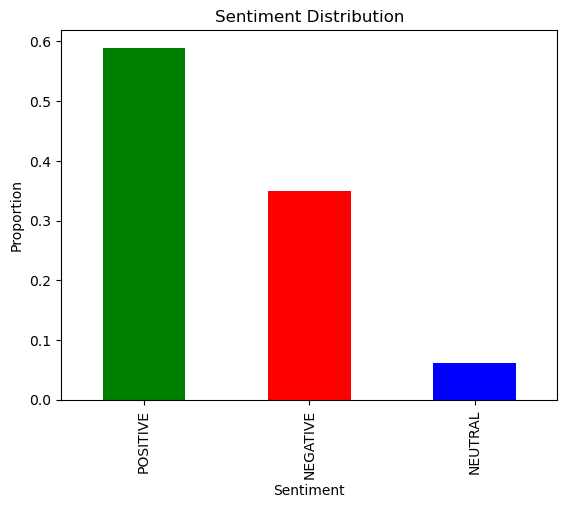

In [28]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()


## 進行關鍵字分析 ##

In [29]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# 定義停用詞
stop_words = set(stopwords.words('english'))

# 清理文本並移除停用詞
def clean_text_for_keywords(text):
    tokens = word_tokenize(text.lower())  # 分詞並轉小寫
    tokens = [word for word in tokens if word.isalpha()]  # 保留字母
    tokens = [word for word in tokens if word not in stop_words]  # 移除停用詞
    return tokens

# 對清理後的文本應用該函數
data['keywords'] = data['cleaned_text'].apply(clean_text_for_keywords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maurice\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maurice\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
from collections import Counter 

# 展平成單個關鍵詞列表
all_keywords = [keyword for keywords_list in data['keywords'] for keyword in keywords_list]

# 統計詞頻
word_freq = Counter(all_keywords)

# 提取前 20 個熱門關鍵詞
top_keywords = word_freq.most_common(20)

print("Top Keywords:")
print(top_keywords)

Top Keywords:
[('trump', 1572), ('would', 800), ('election', 622), ('biden', 554), ('like', 542), ('people', 531), ('harris', 469), ('vote', 443), ('think', 414), ('states', 383), ('even', 383), ('one', 379), ('president', 374), ('us', 364), ('could', 364), ('party', 342), ('republicans', 321), ('voters', 319), ('republican', 319), ('state', 313)]


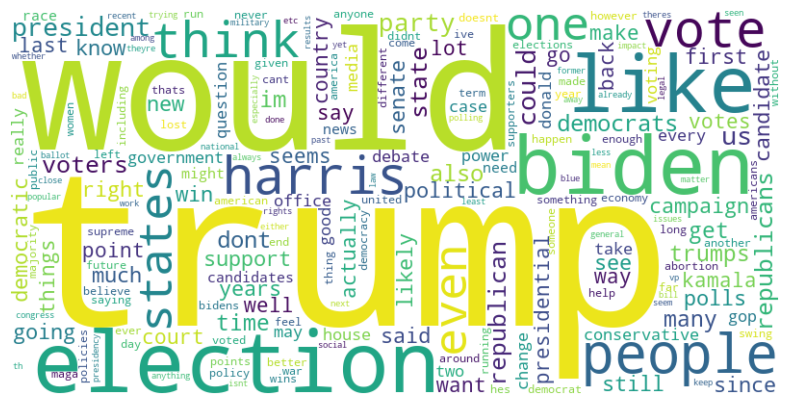

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 生成詞雲
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 顯示詞雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 關鍵字分析結果 ###
- 以上為詞雲分析的結果，關鍵字不外乎就是兩位總統候選人的名字，還有Biden，如果要進行關鍵字分類可以此為基礎。

## 進行貼文主要議題分析 ## 

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 將分詞結果轉換回字符串
data['cleaned_text_str'] = data['cleaned_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# 檢查 cleaned_text 欄位的類型
print(data['cleaned_text_str'].head())
print(data['cleaned_text_str'].apply(type).value_counts())

# 使用 TF-IDF 向量化
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text_str'])

# 查看特徵名稱
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Feature names:", feature_names[:10])  # 顯示前10個特徵詞


0    pennsylvania has just been called this was the...
1    it seems like harris has given up on trying to...
4    link to his words on it   and heres a link to ...
5    colorado supreme court rules trump disqualifie...
6    with lara trump in place by her father rules h...
Name: cleaned_text_str, dtype: object
cleaned_text_str
<class 'str'>    1277
Name: count, dtype: int64
Feature names: ['abandon' 'abandoned' 'abandoning' 'abc' 'abetting' 'ability' 'able'
 'abolishing' 'abortion' 'abortions']


In [33]:
from sklearn.decomposition import LatentDirichletAllocation

# 設置主題數量
n_topics = 5
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# 顯示每個主題的關鍵詞
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# 查看每個主題的前10個關鍵詞
display_topics(lda_model, feature_names, 10)


Topic 0:
taylor nh rallies haley swift recession comeback newsworthy eating overly
Topic 1:
hampshire netanyahu weekend walz tariff venezuela wonder maduro convicted belt
Topic 2:
everyones moments tiktok boycott counts neck guilty goodbye narrowly tone
Topic 3:
interesting unemployed walz gov predicting tight blocks minnesota millennial vermont
Topic 4:
trump election biden like people harris think vote just president


In [34]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from pyLDAvis import display

# 使用 pyLDAvis 構建可視化
lda_vis = pyLDAvis.prepare(
    topic_term_dists=lda_model.components_,
    doc_topic_dists=lda_model.transform(tfidf_matrix),
    doc_lengths=[len(doc) for doc in data['cleaned_text']],
    vocab=tfidf_vectorizer.get_feature_names_out(),
    term_frequency=tfidf_matrix.sum(axis=0).A1
)

# 顯示可視化
pyLDAvis.display(lda_vis)



In [35]:
# 為每篇貼文分配主題
data['topic'] = lda_model.transform(tfidf_matrix).argmax(axis=1)

# 檢查主題分布
topic_counts = data['topic'].value_counts()
print("Topic distribution:")
print(topic_counts)


Topic distribution:
topic
4    1228
1      14
0      14
2      11
3      10
Name: count, dtype: int64


In [36]:
# 分組計算每個主題的情感分布
topic_sentiment = data.groupby('topic')['sentiment'].value_counts(normalize=True).unstack()
print("Sentiment distribution by topic:")
print(topic_sentiment)


Sentiment distribution by topic:
sentiment  NEGATIVE   NEUTRAL  POSITIVE
topic                                  
0          0.357143  0.500000  0.142857
1          0.571429  0.142857  0.285714
2          0.454545  0.272727  0.272727
3          0.400000  0.300000  0.300000
4          0.345277  0.051303  0.603420


## 進行時間序列性分析 ##

In [37]:
import pandas as pd

# 確保日期轉換的格式正確
try:
    data['created_at'] = pd.to_datetime(data['created_at'], format='%Y/%m/%d %H:%M', errors='coerce')
except Exception as e:
    print(f"Error during datetime conversion: {e}")

# 檢查無效日期並過濾
invalid_dates = data[data['created_at'].isna()]
if not invalid_dates.empty:
    print("Found invalid dates:")
    print(invalid_dates.head())
data = data.dropna(subset=['created_at'])

# 確認過濾後數據的基本信息
print(f"Filtered data: {len(data)} rows")

# 確保按周分組的格式
try:
    data['week'] = data['created_at'].dt.to_period('W').astype(str)
except Exception as e:
    print(f"Error during week grouping: {e}")

# 查看分組後的基本分布
print(data['week'].value_counts().head())



Found invalid dates:
               subreddit       id  \
33   PoliticalDiscussion  1bdqmio   
349  PoliticalDiscussion  1gsuqox   
506  PoliticalDiscussion  18clymq   
586  PoliticalDiscussion  1d2qu5y   
692  PoliticalDiscussion  1fxxxrg   

                                                 title  \
33   ?Too many Republican leaders are lying to Ame...   
349  According to the democracy index, the United S...   
506  What do you think the Republicans have done in...   
586  How successful would DeSantis??presidential ca...   
692  How do you foresee the Supreme Court being sha...   

                                                  text  \
33    but to my knowledge Buck is the first to volu...   
349  https://www.democracymatrix.com/ranking I incl...   
506  The Republican Party took a majority in the Ho...   
586   DeSantis was polling around 30% among the Rep...   
692  The obvious x-factor in all this being which p...   

                                                author cre

In [38]:
# 計算每週的情感分布
sentiment_over_time_weekly = data.groupby('week')['sentiment'].value_counts(normalize=True).unstack()

# 填充缺失值
sentiment_over_time_weekly = sentiment_over_time_weekly.fillna(0)

# 查看結果
print(sentiment_over_time_weekly.head())


sentiment              NEGATIVE   NEUTRAL  POSITIVE
week                                               
2023-11-27/2023-12-03  0.000000  0.000000  1.000000
2023-12-04/2023-12-10  0.200000  0.000000  0.800000
2023-12-11/2023-12-17  0.571429  0.000000  0.428571
2023-12-18/2023-12-24  0.357143  0.000000  0.642857
2023-12-25/2023-12-31  0.214286  0.071429  0.714286


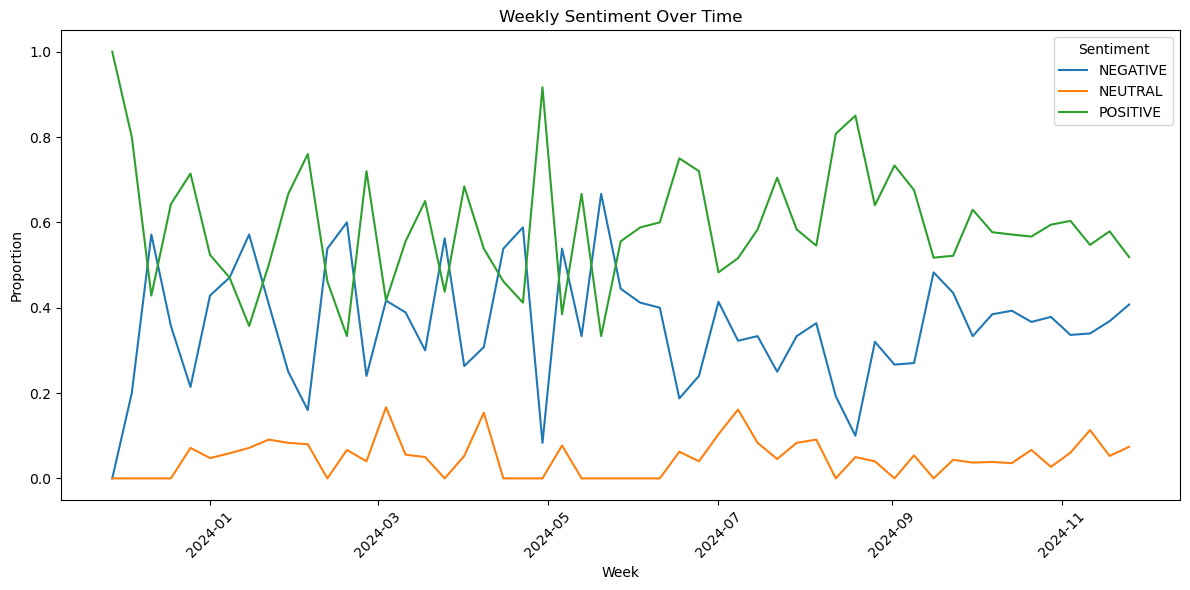

In [39]:
import matplotlib.pyplot as plt

# 提取範圍的開始日期
sentiment_over_time_weekly.index = sentiment_over_time_weekly.index.str.split('/').str[0]

# 將其轉換為標準日期格式
sentiment_over_time_weekly.index = pd.to_datetime(sentiment_over_time_weekly.index, errors='coerce')

plt.figure(figsize=(12, 6))
for sentiment in sentiment_over_time_weekly.columns:
    plt.plot(sentiment_over_time_weekly.index, sentiment_over_time_weekly[sentiment], label=sentiment)

plt.title('Weekly Sentiment Over Time')
plt.xlabel('Week')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


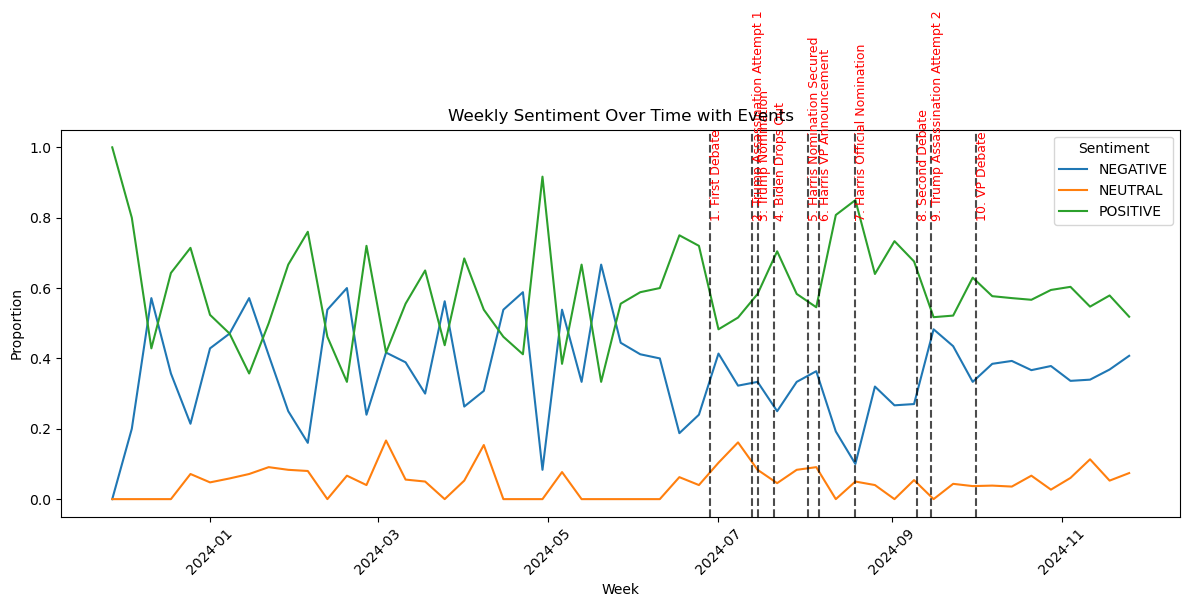

In [40]:
# 事件列表
events = {
    "1. First Debate": "2024-06-28",
    "2. Trump Assassination Attempt 1": "2024-07-13",
    "3. Trump Nomination": "2024-07-15",
    "4. Biden Drops Out": "2024-07-21",
    "5. Harris Nomination Secured": "2024-08-02",
    "6. Harris VP Announcement": "2024-08-06",
    "7. Harris Official Nomination": "2024-08-19",
    "8. Second Debate": "2024-09-10",
    "9. Trump Assassination Attempt 2": "2024-09-15",
    "10. VP Debate": "2024-10-01"
}

# 繪製情感趨勢圖
plt.figure(figsize=(12, 6))
for sentiment in sentiment_over_time_weekly.columns:
    plt.plot(sentiment_over_time_weekly.index, sentiment_over_time_weekly[sentiment], label=sentiment)

# 標記事件
for event_name, event_date in events.items():
    event_date = pd.to_datetime(event_date)
    plt.axvline(event_date, color='black', linestyle='--', alpha=0.7)  # 添加垂直線
    plt.text(event_date, 0.8, event_name, rotation=90, fontsize=9, color='red')  # 添加事件標籤

# 添加圖表標題和圖例
plt.title('Weekly Sentiment Over Time with Events')
plt.xlabel('Week')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
# 定義事件影響範圍（例如 7 天前後）
time_window = pd.Timedelta(days=7)

# 存儲事件前後情感比例
event_impact = {}

for event_name, event_date in events.items():
    event_date = pd.to_datetime(event_date)
    pre_event = sentiment_over_time_weekly.loc[event_date - time_window:event_date]
    post_event = sentiment_over_time_weekly.loc[event_date:event_date + time_window]
    
    # 計算平均情感分布
    event_impact[event_name] = {
        "pre_event": pre_event.mean(),
        "post_event": post_event.mean()
    }

# 查看每個事件前後的情感變化
for event, impact in event_impact.items():
    print(f"Event: {event}")
    print("Pre-event sentiment:", impact["pre_event"])
    print("Post-event sentiment:", impact["post_event"])
    print()


Event: 1. First Debate
Pre-event sentiment: sentiment
NEGATIVE    0.24
NEUTRAL     0.04
POSITIVE    0.72
dtype: float64
Post-event sentiment: sentiment
NEGATIVE    0.413793
NEUTRAL     0.103448
POSITIVE    0.482759
dtype: float64

Event: 2. Trump Assassination Attempt 1
Pre-event sentiment: sentiment
NEGATIVE    0.322581
NEUTRAL     0.161290
POSITIVE    0.516129
dtype: float64
Post-event sentiment: sentiment
NEGATIVE    0.333333
NEUTRAL     0.083333
POSITIVE    0.583333
dtype: float64

Event: 3. Trump Nomination
Pre-event sentiment: sentiment
NEGATIVE    0.327957
NEUTRAL     0.122312
POSITIVE    0.549731
dtype: float64
Post-event sentiment: sentiment
NEGATIVE    0.291667
NEUTRAL     0.064394
POSITIVE    0.643939
dtype: float64

Event: 4. Biden Drops Out
Pre-event sentiment: sentiment
NEGATIVE    0.333333
NEUTRAL     0.083333
POSITIVE    0.583333
dtype: float64
Post-event sentiment: sentiment
NEGATIVE    0.250000
NEUTRAL     0.045455
POSITIVE    0.704545
dtype: float64

Event: 5. Harris

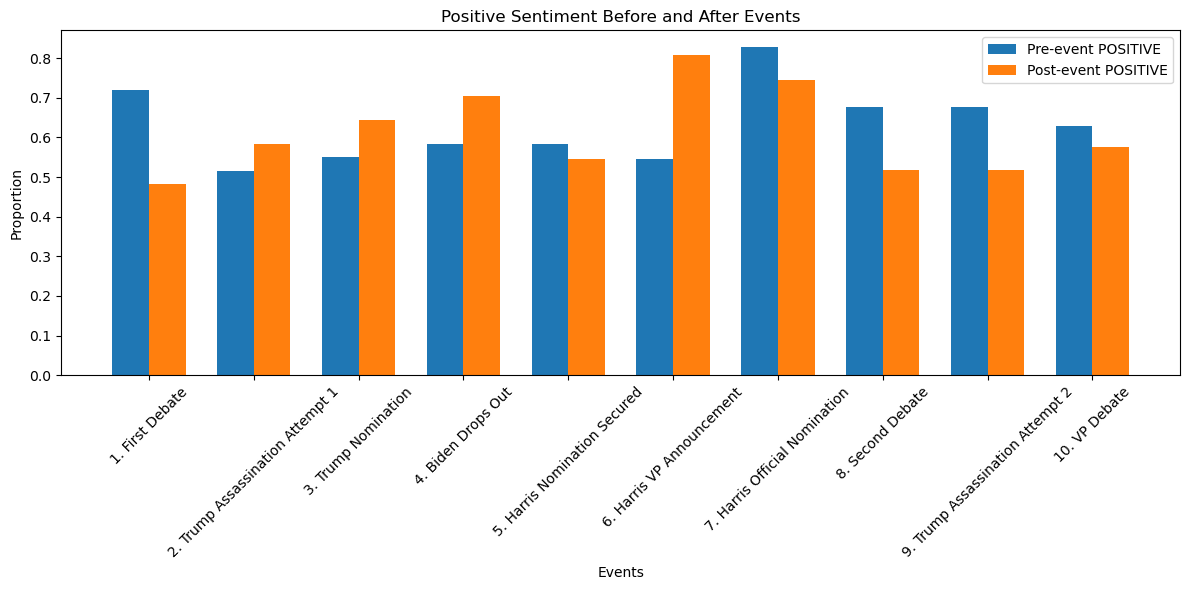

In [42]:
import numpy as np

# 構建條形圖數據
labels = list(event_impact.keys())
pre_event = [impact["pre_event"]["POSITIVE"] for impact in event_impact.values()]
post_event = [impact["post_event"]["POSITIVE"] for impact in event_impact.values()]

# 繪製條形圖
x = np.arange(len(labels))  # 事件索引
width = 0.35  # 條形寬度

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, pre_event, width, label='Pre-event POSITIVE')
ax.bar(x + width/2, post_event, width, label='Post-event POSITIVE')

# 添加標籤和圖例
ax.set_xlabel('Events')
ax.set_ylabel('Proportion')
ax.set_title('Positive Sentiment Before and After Events')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()
